In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("drive/My Drive/task_d.csv")
df.head(2)

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0


In [ ]:
X = df.drop(['target'],axis=1).values
Y = df['target'].values

In [ ]:
df.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


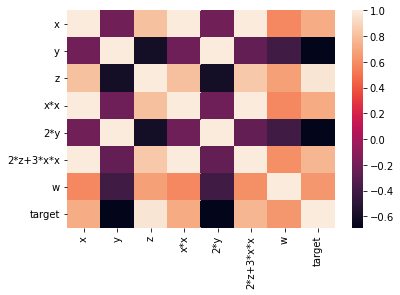

In [ ]:
sns.heatmap(df.corr())

Task 1: Logistic Regression

In [ ]:
clf = SGDClassifier(loss='log',penalty='l2')

In [ ]:
param_grid ={'alpha':np.logspace(-4,4,5)}

In [ ]:
params = GridSearchCV(clf,param_grid,cv=5)

In [ ]:
params.fit(X,Y)
print("best score",params.best_score_)
print("best params",params.best_params_)

best score 1.0
best params {'alpha': 0.01}


In [ ]:
#now creating the logistic regression with the best parameter values

In [ ]:
clf_best = SGDClassifier(loss='log',penalty='l2',alpha=0.0001)
clf_best.fit(X,Y)
best_logistic_model_weights=clf_best.coef_
best_logistic_model_accuracy=clf_best.score(X,Y)
print("accuracy",best_logistic_model_accuracy)
print("weights",best_logistic_model_weights)

accuracy 1.0
weights [[ 9.46221105 -6.42873303 15.37509214  8.4656533  -6.42873303  9.47543456
   8.38250089]]


In [ ]:
X = X + np.random.normal(0,10**-2,X.shape)
# train best model on noisy data

clf_best.fit(X,Y)


best_logistic_model_accuracy_edited = clf_best.score(X,Y)
print(" best logistic model accuracy edited ", best_logistic_model_accuracy_edited)
best_logistic_model_weights_edited = clf_best.coef_
print("Best logistic model coefficents edited", best_logistic_model_weights_edited)

 best logistic model accuracy edited  1.0
Best logistic model coefficents edited [[ 7.57907121 -8.18797292 18.03619874  6.95340082 -8.15968581  8.56621971
  14.73434938]]


In [ ]:
difference = abs(best_logistic_model_accuracy_edited - best_logistic_model_accuracy)
print("difference between 'best_model_accuracy_edited' and 'best_model_accuracy'", difference)

difference between 'best_model_accuracy_edited' and 'best_model_accuracy' 0.0


In [ ]:
abs_weight_difference = abs(best_logistic_model_weights - best_logistic_model_weights_edited)
print(f"absolute weights difference", abs_weight_difference)
abs_weight_percent_diff = abs_weight_difference*100
print(f"absolute weights percent difference", abs_weight_percent_diff)

top4 = np.argsort(-abs_weight_percent_diff)[:,:4]
print('Top 4 feature index ',top4[:4]) #Top 4 feture index with highest difference in weights

features = df.columns

print("Top 4 features having highest absolute percentage weight change are", features[top4])

absolute weights difference [[1.88313985 1.7592399  2.6611066  1.51225248 1.73095278 0.90921484
  6.35184849]]
absolute weights percent difference [[188.31398468 175.92398981 266.11065974 151.22524784 173.09527796
   90.92148448 635.18484861]]
Top 4 feature index  [[6 2 0 1]]
Top 4 features having highest absolute percentage weight change are [['w' 'z' 'x' 'y']]


Task 2: Linear SVM

In [ ]:
clf1 = SGDClassifier(loss='hinge',penalty='l2')
param_grid ={'alpha':np.logspace(-4,4,5)}
params = GridSearchCV(clf1,param_grid,cv=5)
params.fit(X,Y)
print("best score",params.best_score_)
print("best params",params.best_params_)

best score 1.0
best params {'alpha': 0.01}


In [ ]:
clf1_best = SGDClassifier(loss='hinge',penalty='l2',alpha=0.01)
clf1_best.fit(X,Y)
best_linsvm_model_weights=clf1_best.coef_
best_linsvm_model_accuracy=clf1_best.score(X,Y)


In [ ]:
print("model weights:",best_logistic_model_weights)
print("model accuracy:",best_logistic_model_accuracy)

model weights: [[ 9.46221105 -6.42873303 15.37509214  8.4656533  -6.42873303  9.47543456
   8.38250089]]
model accuracy: 1.0


In [ ]:
X = X + np.random.normal(0,10**-2,X.shape)
# train best model on noisy data

clf_best.fit(X,Y)


best_linsvm_model_accuracy_edited = clf1_best.score(X,Y)
print(" best logistic model accuracy edited ", best_logistic_model_accuracy_edited)
best_linsvm_model_weights_edited = clf1_best.coef_
print("Best logistic model coefficents edited", best_logistic_model_weights_edited)

 best logistic model accuracy edited  1.0
Best logistic model coefficents edited [[ 7.57907121 -8.18797292 18.03619874  6.95340082 -8.15968581  8.56621971
  14.73434938]]


In [ ]:
difference = abs(best_linsvm_model_accuracy_edited - best_linsvm_model_accuracy)
print("difference between 'best_model_accuracy_edited' and 'best_model_accuracy'", difference)

difference between 'best_model_accuracy_edited' and 'best_model_accuracy' 0.0


In [ ]:
abs_weight_difference = abs(best_linsvm_model_weights - best_linsvm_model_weights_edited)
print(f"absolute weights difference", abs_weight_difference)
abs_weight_percent_diff = abs_weight_difference*100
print(f"absolute weights percent difference", abs_weight_percent_diff)

top4 = np.argsort(-abs_weight_percent_diff)[:,:4]
print('Top 4 feature index ',top4[:4]) 

features = df.columns

print("Top 4 features having highest absolute percentage weight change are", features[top4])

absolute weights difference [[0. 0. 0. 0. 0. 0. 0.]]
absolute weights percent difference [[0. 0. 0. 0. 0. 0. 0.]]
Top 4 feature index  [[0 1 2 3]]
Top 4 features having highest absolute percentage weight change are [['x' 'y' 'z' 'x*x']]


Observations:

*   We can see that the model accuracy is not changed even after adding the noise to the  data.
*   There is a difference that can be seen in the weights.


*   There is collinearity between features and since the accuracy was not changed as much we can say that this collinearity was preserved even after the noise was added.






8 E

In [ ]:
#https://github.com/cr21/Behavior-of-Linear-Model-Machine-Learning-Study/blob/main/SVM_RBF_Kernel_8E.ipynb

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X,y = make_classification(n_samples = 5000,n_features = 5,n_redundant=2,n_classes=2,weights=[0.7],class_sep=0.7,random_state=15)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
X_cv,X_test,y_cv,y_test = train_test_split(X_test,y_test,test_size = 0.5,random_state=42)

print("X Train shape",X_train.shape )
print("X Test shape",X_test.shape )
print("X Cv shape",X_cv.shape )                                                                                   


X Train shape (3000, 5)
X Test shape (1000, 5)
X Cv shape (1000, 5)


In [ ]:
clf=SVC(gamma=0.001,C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

In [ ]:
vector_indices = clf.support_
vector_dual_coeffs = clf.support_vectors_

In [ ]:
def rbf_func(x,xi,gamma):
  return np.exp(-gamma*np.sum((x-xi)**2,axis=-1))

In [ ]:
def kernel_rbf(support_vectors,x,gamma):
  kernels = np.zeros((x.shape[0],support_vectors.shape[0]))  #creating kernel matrix cuz we can further fill it with values
  for index,point in enumerate(x):
    for index1,vector in enumerate(support_vectors): #each point has vectors
      rbf_val = rbf_func(point,vector,gamma)
      kernels[index][index1] = rbf_val
  return kernels    

In [ ]:
def decision_func(x,intercept,dual_coeff,support_vector,gamma):
  
  dec_func = np.sum(dual_coeff*kernel_rbf(support_vector,x,gamma),axis=-1) + intercept
  return dec_func

In [ ]:
dec_func = decision_func(X_cv,clf.intercept_,clf.dual_coef_,clf.support_vectors_,0.001)

Task F

In [ ]:
array_vals,array_count=np.unique(y_train,return_counts=True)
print(array_vals,array_count)

[0 1] [2070  930]


In [ ]:
def calibProb(Y):
  n_positive = array_count[1]
  n_negative = array_count[0]
  print("positive values:",n_positive)
  print("negative values:",n_negative)
  calib_y_positive = (n_positive + 1) / (n_positive + 2)
  calib_y_negative = 1/ (n_negative + 2)
  return calib_y_positive,calib_y_negative

In [ ]:
calib_pos_cv,calib_neg_cv = calibProb(y_cv)
print("calib_pos_cv: {}, calib_neg_cv; {}".format(calib_pos_cv,calib_neg_cv))

positive values: 930
negative values: 2070
calib_pos_cv: 0.9989270386266095, calib_neg_cv; 0.00048262548262548264


In [ ]:
def updated_y(y, y_train ):
  updated_y = []
  calib_y_pos, calib_y_neg = calibProb(y_train)
  for i in y:
    if i == 1:
      updated_y.append(calib_y_pos)
    else:
      updated_y.append(calib_y_neg)
  return updated_y

In [ ]:
def sigmoid(w,x,b):
  return 1/(1+np.exp(-(np.dot(x,w.T)+b)))

In [ ]:
def log_loss(w,b,x,y):
  sum_log = 0
  for i in range(n):
    sum_log += y[i]*np.log10(sigmoid(w,x[i],b)) + (1-y[i])*np.log10(1-sigmoid(w,x[i],b))
    return -1*sum_log/n

In [ ]:
n = len(dec_func)
f_cv = dec_func
w = np.zeros_like(f_cv[0],)
b = 0
eta0 = 0.001
alpha = 0.0001

cv_loss = []
EPOCH = 1
prevLoss = float("inf")
y = updated_y(y_cv,y_train)
for epoch in range(0,10):
  
  for j in range(N):
    w =  ((1-((eta0*alpha)/N)) * w) + (eta0 * f_cv[j]) * (y[j] -sigmoid(w,f_cv[j],b))
    b = b + (eta0)*(y[j] - sigmoid(w,f_cv[j],b))
    loss = log_loss(w,b,f_cv,y)
    
  loss_val = log_loss(w,b,f_cv,y)
  cv_loss.append(loss_val)


positive values: 930
negative values: 2070


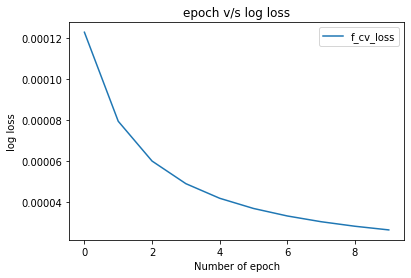

In [ ]:
import matplotlib.pyplot as plt 
epoch=np.arange(0,10) 
plt.plot(epoch,cv_loss,label='f_cv_loss')
plt.legend()
plt.xlabel("Number of epoch")
plt.ylabel("log loss")
plt.title("epoch v/s log loss")
plt.show()

In [ ]:
optimized_w = w
optimized_b = b
print("optimized_w {} optimized_b {}".format(optimized_w,optimized_b) )

optimized_w 1.4961567940623555 optimized_b -0.14743287088617718


In [ ]:
f_test = decision_func(X_test,clf.intercept_, clf.dual_coef_, clf.support_vectors_, 0.001 )

In [ ]:
probabilties = sigmoid(optimized_w, f_test, optimized_b)